# Quarentena Dados 01 - Exploratory Data Analysis

In [0]:
import pandas as pd 

In [0]:
#creating dataframe
movie = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv')

In [0]:
#View movie dataframe head
#update feature name
movie.columns = ["filmeId", "titulo", "generos"] 
movie.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [0]:
#Read documentation
?movie

In [0]:
#creating ratings dataframe and view head 5
ratings = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [0]:
#update feature name
ratings.columns = ["usuarioId", "filmeId", "nota", "momento"]

In [0]:
#Show dataframe form
ratings.shape

(100836, 4)

In [0]:
ratings.describe()

,usuarioId,filmeId,nota,momento
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [0]:
#select movie one data
rating_movie_one = ratings.query("filmeId == 1")

In [0]:
#describe data movie one
rating_movie_one.describe()

,usuarioId,filmeId,nota,momento
count,215.000000,215.0,215.000000,2.150000e+02
mean,306.530233,1.0,3.920930,1.129835e+09
std,180.419754,0.0,0.834859,2.393163e+08
min,1.000000,1.0,0.500000,8.293223e+08
25%,155.500000,1.0,3.500000,8.779224e+08
50%,290.000000,1.0,4.000000,1.106855e+09
75%,468.500000,1.0,4.500000,1.348523e+09
max,610.000000,1.0,5.000000,1.535710e+09


In [0]:
#mean data feature movie one
rating_movie_one.mean()

usuarioId    3.065302e+02
filmeId      1.000000e+00
nota         3.920930e+00
momento      1.129835e+09
dtype: float64

In [0]:
#notes possible
ratings['nota']

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

In [0]:
ratings['nota'].mean()

3.501556983616962

In [0]:
rating_movie_one['nota'].mean()

3.9209302325581397

In [0]:
#describe average rating movie 
average_rating_movie = ratings.groupby('filmeId')['nota'].mean()
average_rating_movie.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

In [0]:
movie

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [0]:
#Showing mean per movie
movie_per_mean = movie.join(average_rating_movie, on= 'filmeId')
movie_per_mean.head()

,filmeId,titulo,generos,nota
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


In [0]:
#sort movie per bigger rating 
movie_per_mean.sort_values('nota', ascending=False).head(15)

,filmeId,titulo,generos,nota
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0
9094,143511,Human (2015),Documentary,5.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0
4251,6201,Lady Jane (1986),Drama|Romance,5.0
8154,102217,Bill Hicks: Revelations (1993),Comedy,5.0
8148,102084,Justice League: Doom (2012),Action|Animation|Fantasy,5.0
4246,6192,Open Hearts (Elsker dig for evigt) (2002),Romance,5.0
9122,145994,Formula of Love (1984),Comedy,5.0


In [0]:
ratings

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


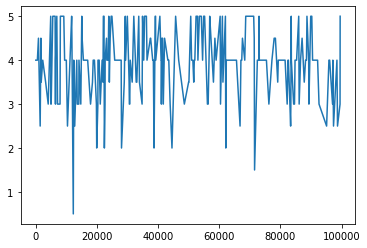

In [0]:
#creating line plot movie one
ratings.query('filmeId == 1')['nota'].plot()

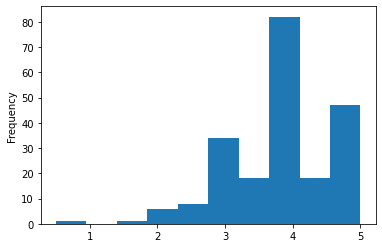

In [0]:
#creating histogram movie one data
ratings.query('filmeId == 1')['nota'].plot(kind = 'hist')

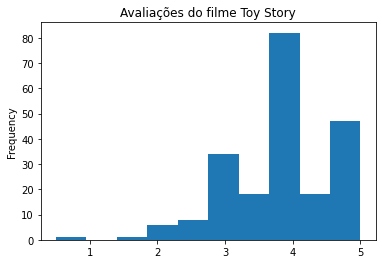

In [0]:
#creating histogram movie one data with title
ratings.query('filmeId == 1')['nota'].plot(kind ='hist',
                                          title = 'Avaliações do filme Toy Story')

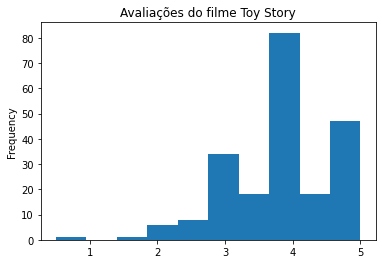

In [0]:
#creating histogram with matplotlib
import matplotlib.pyplot as plt
plt.title('Avaliações do filme Toy Story')
ratings.query('filmeId == 1')['nota'].plot(kind = 'hist')
plt.show()

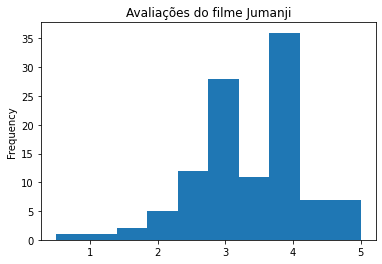

In [0]:
ratings.query('filmeId == 2')['nota'].plot(kind = 'hist',
                                           title = 'Avaliações do filme Jumanji')

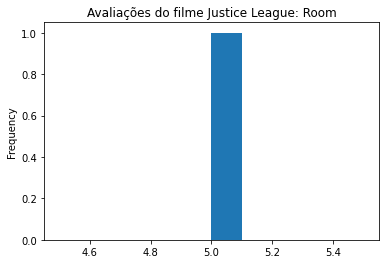

In [0]:
ratings.query('filmeId == 102084')['nota'].plot(kind = 'hist',
                                                title = 'Avaliações do filme Justice League: Room')

#Challenge 

### Challenge one: Mostrar os filmes que não tem avaliações. 

In [96]:
#Eighteen movies no present rating
movie_per_mean.isnull().sum()

filmeId     0
titulo      0
generos     0
nota       18
dtype: int64

In [108]:
#creating object receive null values true
movie_null = pd.isnull(movie_per_mean['nota'])

#filter null values in dataset master
movie_per_mean[movie_null]

,filmeId,titulo,generos,nota
816,1076,"Innocents, The (1961)",Drama|Horror|Thriller,NaN
2211,2939,Niagara (1953),Drama|Thriller,NaN
2499,3338,For All Mankind (1989),Documentary,NaN
2587,3456,"Color of Paradise, The (Rang-e khoda) (1999)",Drama,NaN
3118,4194,I Know Where I'm Going! (1945),Drama|Romance|War,NaN
4037,5721,"Chosen, The (1981)",Drama,NaN
4506,6668,"Road Home, The (Wo de fu qin mu qin) (1999)",Drama|Romance,NaN
4598,6849,Scrooge (1970),Drama|Fantasy|Musical,NaN
4704,7020,Proof (1991),Comedy|Drama|Romance,NaN
5020,7792,"Parallax View, The (1974)",Thriller,NaN


### Challenge two: Mudar o nome da coluna nota do dataframe filmes_com_media(movie_per_mean) para nota_média após o join.

In [109]:
movie_per_mean

,filmeId,titulo,generos,nota
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.000000
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.500000
9739,193585,Flint (2017),Drama,3.500000
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.500000


In [0]:
movie_per_mean.columns = ['filmeId', 'titulo', 'generos', 'notas_media']

In [119]:
movie_per_mean

,filmeId,titulo,generos,notas_media
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.000000
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.500000
9739,193585,Flint (2017),Drama,3.500000
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.500000


### Challenge Three: Colocar o número de avaliações por filme, isto é, não só a média mas o TOTAL de votos por filme.

In [115]:
#Creating object that receive value total per movie
total_per_movie = ratings.groupby('filmeId')['nota'].count()
total_per_movie.head()

filmeId
1    215
2    110
3     52
4      7
5     49
Name: nota, dtype: int64

In [116]:
#creating dataframe with total value
movie_per_total = movie.join(total_per_movie, on= 'filmeId')
movie_per_total.head()

,filmeId,titulo,generos,nota
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,7.0
4,5,Father of the Bride Part II (1995),Comedy,49.0


### Challenge Four: Arredondar as médias (coluna de nota média) para duas casas decimais.

In [125]:
#round notas_media
movie_per_mean.round({'notas_media':2})

,filmeId,titulo,generos,notas_media
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36
4,5,Father of the Bride Part II (1995),Comedy,3.07
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.00
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.50
9739,193585,Flint (2017),Drama,3.50
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.50


### Challenge Five: Descobrir os generos dos filmes (quais são eles, únicos). (esse aqui o bicho pega)

In [152]:
#data wrangling with genres
#str.split: transform feature in list 
#expand = True : return DataFrame/MultiIndex expanding dimensionality.
#stack: pivot in column. Create line in column and describe your index
#unique: equal in distinct in SQL and transform in array
#tolist: transfom array in list
movie['generos'].str.split('|', expand = True).stack().unique().tolist()

['Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Fantasy',
 'Romance',
 'Drama',
 'Action',
 'Crime',
 'Thriller',
 'Horror',
 'Mystery',
 'Sci-Fi',
 'War',
 'Musical',
 'Documentary',
 'IMAX',
 'Western',
 'Film-Noir',
 '(no genres listed)']

### Challenge Six: Contar o número de aparições de cada genero.

In [161]:
#str.get_dummies: transform cathegoric variable into feature 
movie['generos'].str.get_dummies(sep ='|').sum()

(no genres listed)      34
Action                1828
Adventure             1263
Animation              611
Children               664
Comedy                3756
Crime                 1199
Documentary            440
Drama                 4361
Fantasy                779
Film-Noir               87
Horror                 978
IMAX                   158
Musical                334
Mystery                573
Romance               1596
Sci-Fi                 980
Thriller              1894
War                    382
Western                167
dtype: int64

### Challenge 7:Plotar o gráfico de aparições de cada genero. Pode ser um gráfico de tipo igual a barra.

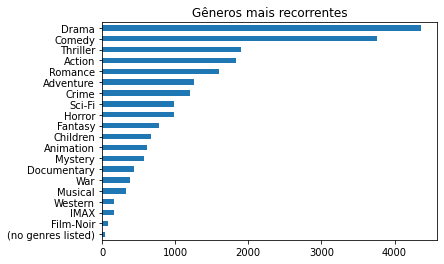

In [169]:
#creating object that receive sort values genrer
generos = movie['generos'].str.get_dummies(sep ='|').sum()

import matplotlib.pyplot as plt
generos.sort_values(ascending = True).plot(kind = 'barh')
plt.title('Gêneros mais recorrentes')
plt.show()